In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [3]:
train_ds = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
test_ds = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

In [4]:
train_ds.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
y_train = train_ds['label']
y_test = test_ds['label']
del train_ds['label']
del test_ds['label']

In [6]:
# this gonna generate one hot encoding
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [7]:
x_train = train_ds.values
x_test = test_ds.values

In [8]:
# normalizing by doing this it'll be easier for neural network

x_train = x_train/255
x_test = x_test/255

In [9]:
x_train.shape

(27455, 784)

In [10]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

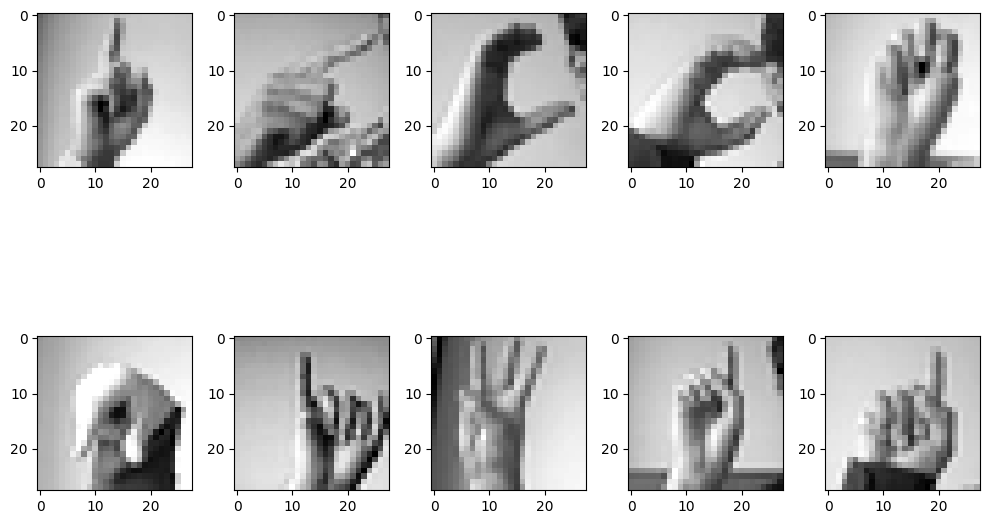

In [11]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
#         ax[i, j].set_title(f"{y_train[k]}")
        k += 1
    plt.tight_layout()

In [12]:
from keras.preprocessing.image import ImageDataGenerator

# To avoid overfitting we can expand our data artificially

datagen = ImageDataGenerator(
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    zoom_range=0.2, 
    shear_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest'
)

datagen.fit(x_train)

In [13]:
model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), strides = 1, padding='same', activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding='same'),
    Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding='same'),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(24, activation='softmax')
])

In [14]:
model.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 dropout (Dropout)           (None, 14, 14, 128)       0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 128)       5

In [15]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=20, validation_data = (x_test, y_test))

Epoch 1/20
215/215 [==============================] - 117s 533ms/step - loss: 2.6697 - accuracy: 0.2122 - val_loss: 7.4157 - val_accuracy: 0.0608
Epoch 2/20
215/215 [==============================] - 114s 532ms/step - loss: 1.4018 - accuracy: 0.5232 - val_loss: 15.0908 - val_accuracy: 0.0629
Epoch 3/20
215/215 [==============================] - 109s 508ms/step - loss: 0.8192 - accuracy: 0.7132 - val_loss: 0.7549 - val_accuracy: 0.7496
Epoch 4/20
215/215 [==============================] - 109s 507ms/step - loss: 0.5443 - accuracy: 0.8088 - val_loss: 0.5313 - val_accuracy: 0.7830
Epoch 5/20
215/215 [==============================] - 109s 509ms/step - loss: 0.4068 - accuracy: 0.8570 - val_loss: 0.2286 - val_accuracy: 0.9253
Epoch 6/20
215/215 [==============================] - 110s 511ms/step - loss: 0.3092 - accuracy: 0.8941 - val_loss: 0.0619 - val_accuracy: 0.9767
Epoch 7/20
215/215 [==============================] - 110s 510ms/step - loss: 0.2681 - accuracy: 0.9093 - val_loss: 0.1759 

In [16]:
print(f"Accuracy of model is {model.evaluate(x_test, y_test)[1]*100:.2f} %")

225/225 [==============================] - 7s 31ms/step - loss: 0.0362 - accuracy: 0.9872
Accuracy of model is 98.72 %


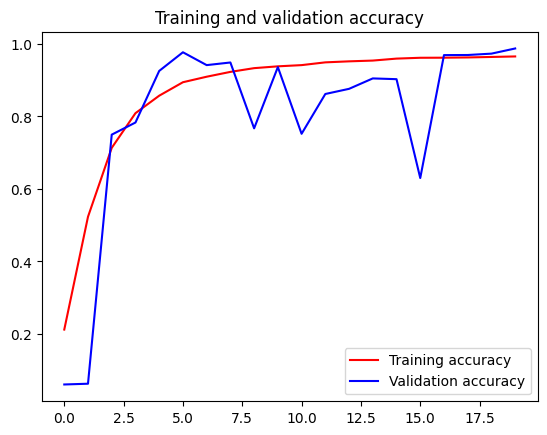

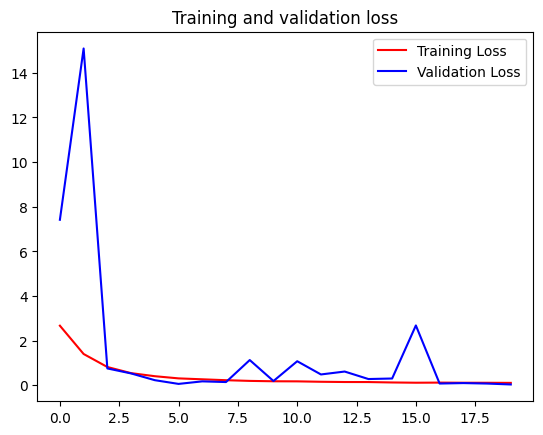

In [17]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()